# Lab 1: Getting started

Some usefull links:

1. Python: https://www.python.org/downloads/

2. pip: 
    https://realpython.com/what-is-pip/ , 
    https://pip.pypa.io/en/stable/installation/ , 
    https://pip.pypa.io/en/stable/cli/pip_list/ 

3. Jupyter notebook: https://jupyter.org
       
4. Anaconda: https://www.anaconda.com/products/individual

5. vscode <> jupyter notebook: https://code.visualstudio.com/docs/datascience/jupyter-notebooks
---

Libraries: 

- Numpy https://numpy.org 
- Pandas https://pandas.pydata.org 
- Scikit-learn https://scikit-learn.org/stable/ 
- matplotlib https://matplotlib.org 
- plotly https://plotly.com/python/


## General imports

In [1]:
import numpy as np
import pandas as pd 
import matplotlib as mp
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

Airbnb dataset: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data 

In [2]:
airbnb_ori = pd.read_csv('AB_NYC_2019.csv')
airbnb = airbnb_ori.copy()

In [3]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Basic Data Cleaning

### Clean columns

In [5]:
# Exclude not useful columns
airbnb.drop(['id','host_name','last_review'], axis=1, inplace=True)
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               38843 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

### Missing values

<Axes: >

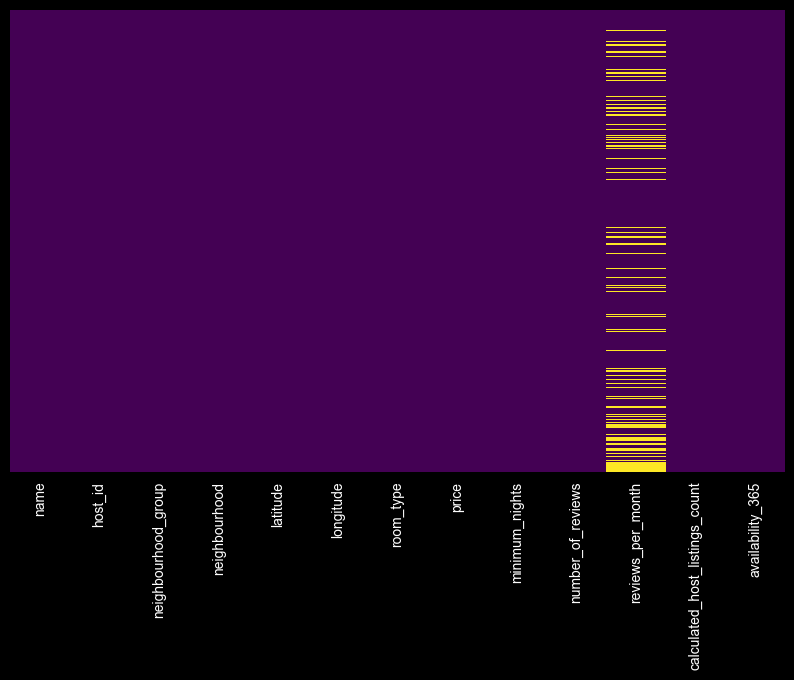

In [6]:
# visualize null values
plt.figure(figsize=(10, 6))
sns.heatmap(airbnb.isnull(), yticklabels=False, cmap='viridis', cbar=False)

In [7]:
# Creating a mask
airbnb['name'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Name: name, Length: 48895, dtype: bool

In [8]:
# Applying and vizualizing mask 
airbnb[airbnb['name'].isnull()]

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
2854,NaN,6676776,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,1,362
3703,NaN,11395220,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,0.45,1,341
5775,NaN,20700823,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,0.02,1,0
5975,NaN,22686810,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,0.09,1,0
6269,NaN,21600904,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaN,1,0
6567,NaN,1832442,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,NaN,1,0
6605,NaN,24625694,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,NaN,1,0
8841,NaN,31147528,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,NaN,1,0
11963,NaN,33377685,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,190,4,1,0.02,1,0
12824,NaN,50448556,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,NaN,5,0


In [9]:
airbnb.isnull().sum()

name                                 16
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Null values

In [10]:
#replacing all NaN values in 'reviews_per_month' with 0
airbnb.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
airbnb.reviews_per_month.isnull().sum()

np.int64(0)

In [11]:
# remove rows with missing values
airbnb = airbnb.dropna()
airbnb.dropna(inplace=True)

airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48879 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48879 non-null  int64  
 2   neighbourhood_group             48879 non-null  object 
 3   neighbourhood                   48879 non-null  object 
 4   latitude                        48879 non-null  float64
 5   longitude                       48879 non-null  float64
 6   room_type                       48879 non-null  object 
 7   price                           48879 non-null  int64  
 8   minimum_nights                  48879 non-null  int64  
 9   number_of_reviews               48879 non-null  int64  
 10  reviews_per_month               48879 non-null  float64
 11  calculated_host_listings_count  48879 non-null  int64  
 12  availability_365                48879

In [12]:
airbnb.isnull().sum()

name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### Drop duplicates

In [13]:
airbnb.duplicated().any()

## if true
# airbnb.drop_duplicates()

## if you want to drop duplicates at specific column
# airbnb.drop('col_name', axis=1, inplace=True).drop_duplicates()

np.False_

## Data Visualization & Discovery

In [14]:
#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style('white')

In [15]:
airbnb.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.887900e+04,48879.000000,48879.000000,48879.000000,48879.000000,48879.000000,48879.000000,48879.000000,48879.000000
mean,6.763013e+07,40.728945,-73.952168,152.722355,7.011027,23.281205,1.091248,7.145891,112.788989
std,7.862070e+07,0.054529,0.046160,240.186804,20.016000,44.556149,1.597433,32.957738,131.613322
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.816856e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079133e+07,40.723080,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763110,-73.936280,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


<Axes: >

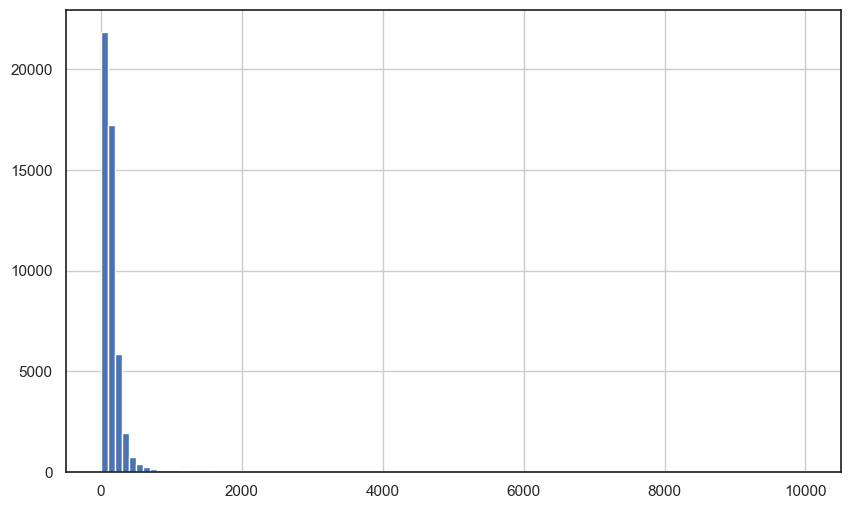

In [16]:
plt.figure(figsize=(10, 6))
airbnb['price'].hist(bins=100)

<Axes: >

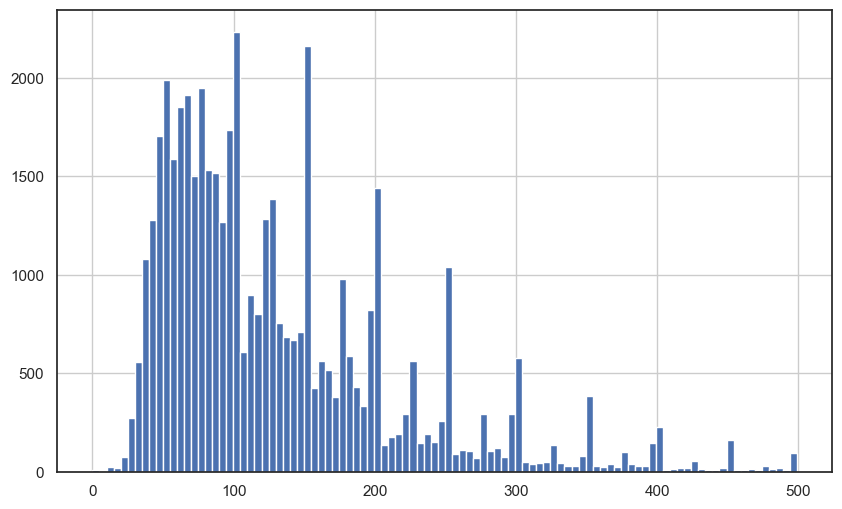

In [17]:
#creating a sub-dataframe with no extreme values / less than 500
airbnb=airbnb[airbnb.price < 500]
plt.figure(figsize=(10, 6))
airbnb['price'].hist(bins=100)

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

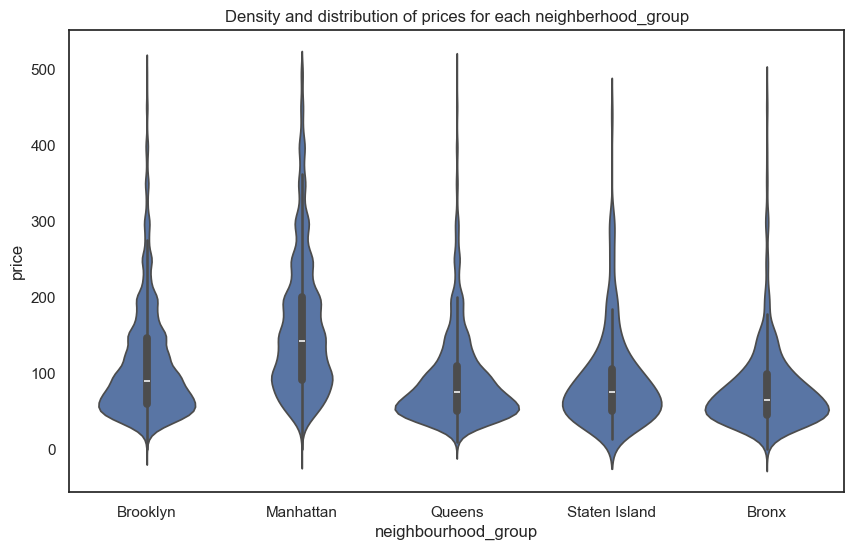

In [18]:
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=airbnb, x='neighbourhood_group', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

<Axes: xlabel='neighbourhood_group'>

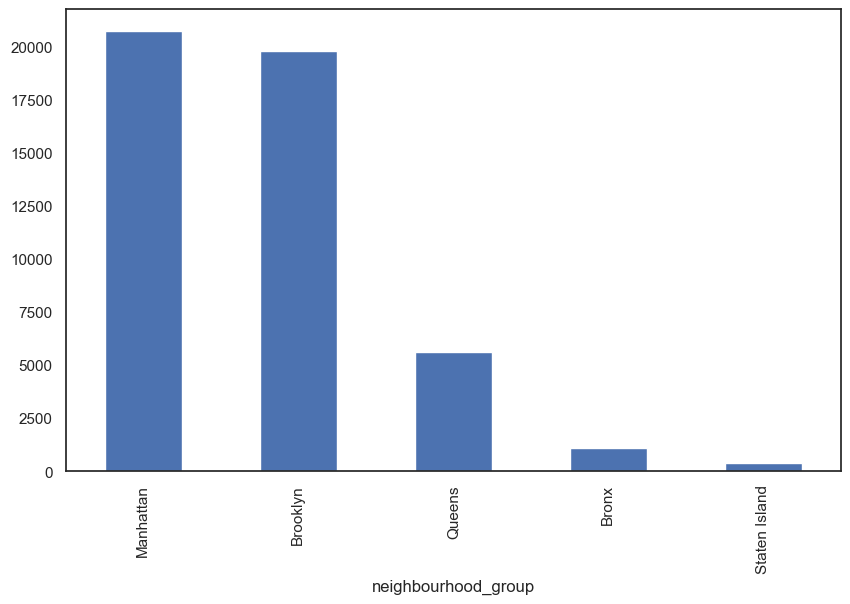

In [19]:
airbnb['neighbourhood_group'].value_counts().plot.bar()

In [20]:
#examining the unique values of neighbourhood as this column will appear very handy for later analysis
len(airbnb.neighbourhood.unique())

219

<Axes: xlabel='room_type'>

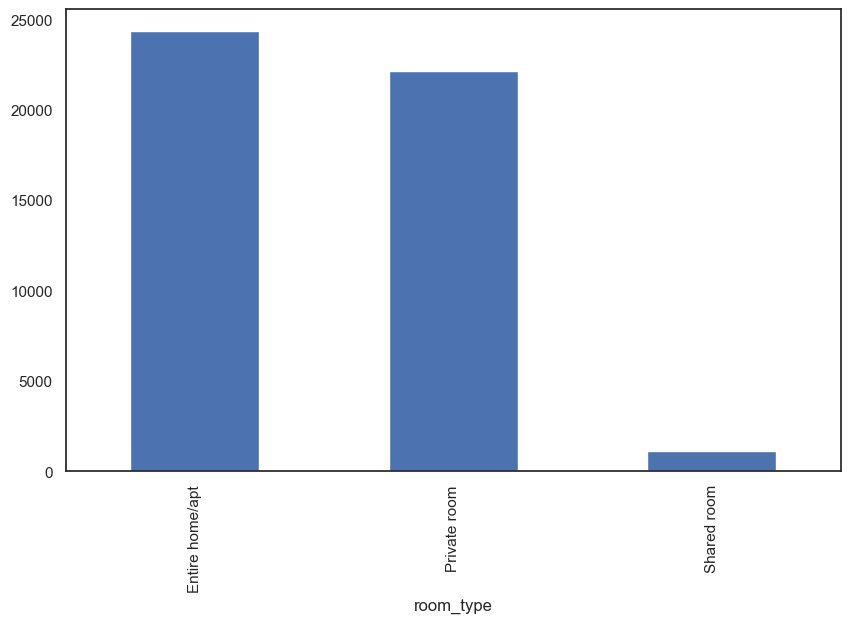

In [21]:
#examining the unique values of room_type as this column will appear very handy for later analysis
airbnb['room_type'].value_counts().plot.bar()

<Axes: xlabel='longitude', ylabel='latitude'>

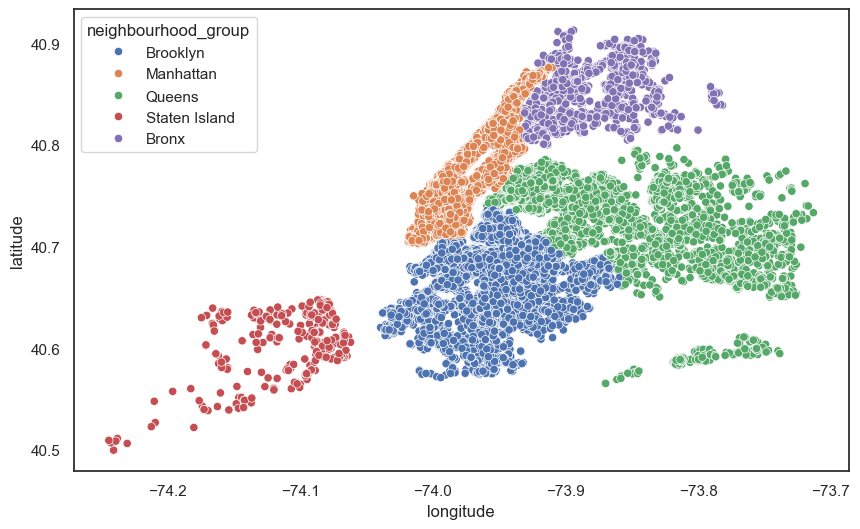

In [22]:
sns.scatterplot(x=airbnb.longitude,y=airbnb.latitude,hue=airbnb.neighbourhood_group)

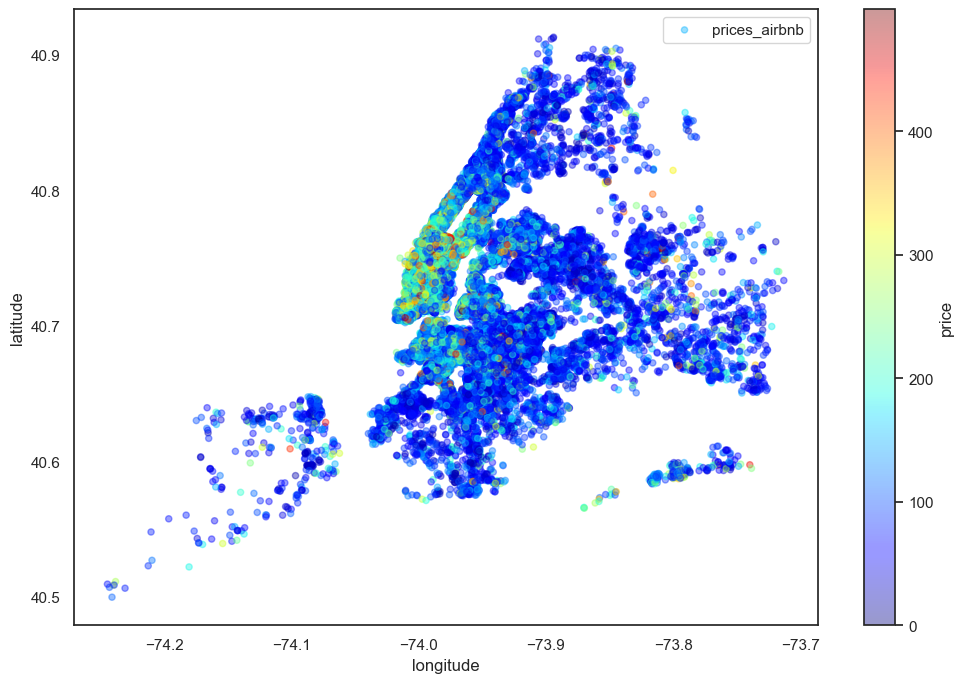

In [23]:
airbnb.plot(kind='scatter', x='longitude', y='latitude', c='price', label='prices_airbnb',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(12,8))
plt.legend()

Think about what other visualizations could help you understand the dataset better.  
Also consider what other data cleaning you would do when preparing this data to be used in training a model.  
We will cover more of that on the next lab!

## Simple price prediction

In [24]:
#airbnb_pred = airbnb[airbnb['neighbourhood_group']=='Manhattan']
airbnb_pred = airbnb.drop(['name','host_id','calculated_host_listings_count', 'availability_365',
                           #'neighbourhood_group', 'neighbourhood', 'room_type',
                           'minimum_nights', 'number_of_reviews', 'reviews_per_month'], axis=1)
airbnb_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47644 entries, 0 to 48894
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  47644 non-null  object 
 1   neighbourhood        47644 non-null  object 
 2   latitude             47644 non-null  float64
 3   longitude            47644 non-null  float64
 4   room_type            47644 non-null  object 
 5   price                47644 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 2.5+ MB


In [25]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object
le = LabelEncoder()
airbnb_pred[['neighbourhood_group', 'neighbourhood', 'room_type']] = airbnb_pred[['neighbourhood_group', 'neighbourhood', 'room_type',]].apply(LabelEncoder().fit_transform)
airbnb_pred.price = np.log1p(airbnb_pred.price) # log transformation, we will talk about this on lab2. for now just know that it has to do with data distribution and the inverse op is np.expm1()

In [26]:
airbnb_pred.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price
0,1,107,40.64749,-73.97237,1,5.010635
1,2,126,40.75362,-73.98377,0,5.420535
2,2,93,40.80902,-73.94190,1,5.017280
3,1,41,40.68514,-73.95976,0,4.499810
4,2,61,40.79851,-73.94399,0,4.394449


<Axes: >

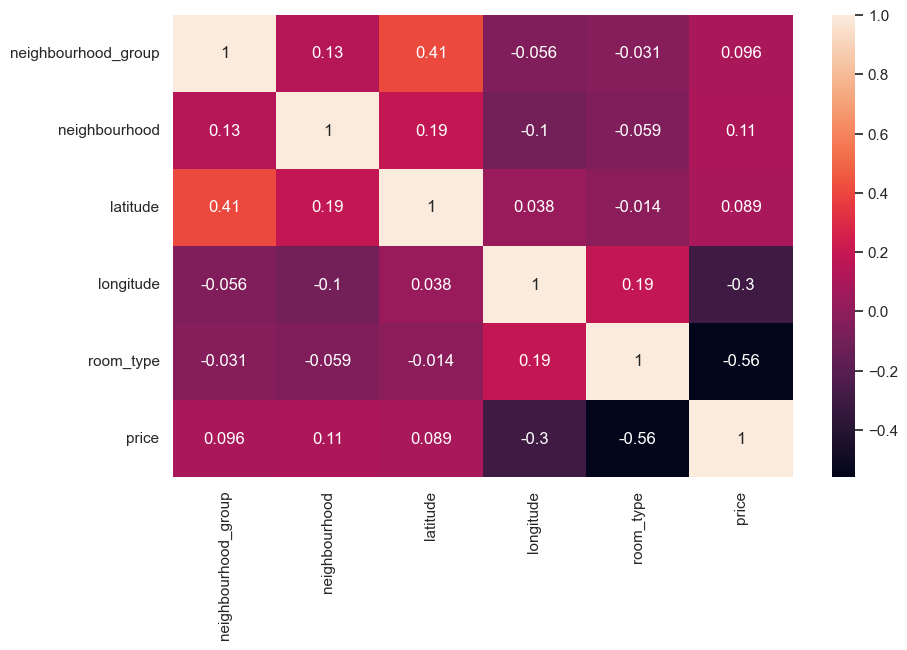

In [27]:
#Get Correlation between different variables
corr = airbnb_pred.corr(method='kendall')
sns.heatmap(corr, annot=True)

In [28]:
y = airbnb_pred.price
X = airbnb_pred.drop(['price'], axis=1)

### Split dataset

In [29]:
from sklearn.model_selection import train_test_split

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (33350, 5) (33350,)
Test (14294, 5) (14294,)


### Train a model

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.tree import DecisionTreeRegressor
reg = GradientBoostingRegressor()
reg.fit(X_train, y_train)

,"loss loss: {'squared_error', 'absolute_error', 'huber', 'quantile'}, default='squared_error'Loss function to be optimized. 'squared_error' refers to the squarederror for regression. 'absolute_error' refers to the absolute error ofregression and is a robust loss function. 'huber' is acombination of the two. 'quantile' allows quantile regression (use`alpha` to specify the quantile).See:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_quantile.py`for an example that demonstrates quantile regression for creatingprediction intervals with `loss='quantile'`.",'squared_error'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.",0.1
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",100
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are""friedman_mse"" for the mean squared error with improvement score byFriedman, ""squared_error"" for mean squared error. The default value of""friedman_mse"" is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",3
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft 

### Evaluate and visualize results

In [31]:
y_pred = reg.predict(X_test)

In [32]:
reg.score(X_test, y_test) #r2 score

0.5659327305615798

In [33]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.3107008971995044

Text(0.5, 1.0, 'Predicted vs Actual price')

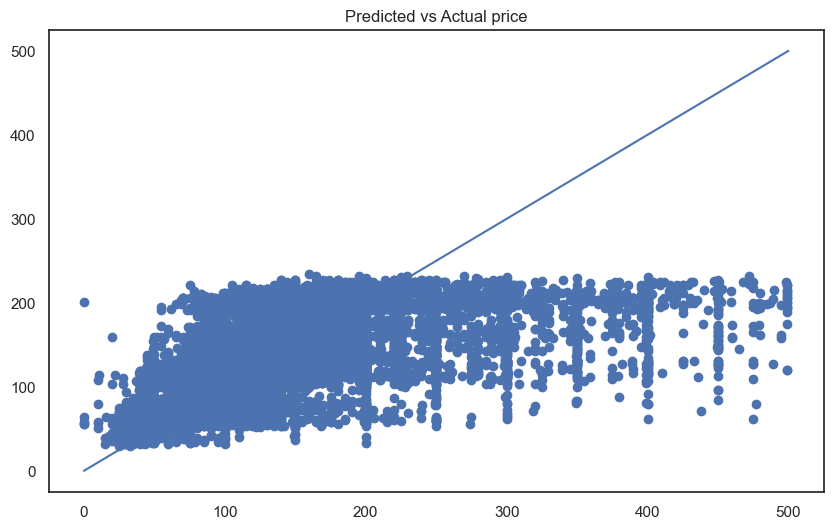

In [34]:
plt.scatter(np.expm1(y_test), np.expm1(y_pred))
plt.plot([0,500],[0,500])
plt.title("Predicted vs Actual price")

## Optional task: Predicting rainfall

Load the dataset from 'weatherAUS.csv' and play around with it.  
Optionally, try to create a minimalistic model to predict rainfall.